In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i].fillna(data[i].mode()[0], inplace = True)
    else:
        data[i].fillna(data[i].mean(), inplace = True)

data.isnull().sum().sort_values(ascending = False).head()

Loan_ID       0
Gender        0
Married       0
Dependents    0
Education     0
dtype: int64

In [8]:
num = data.select_dtypes(include = np.number)
cat = data.select_dtypes(exclude = np.number)


display(num.head())
display(cat.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [22]:
ds = data.copy()

# force convert the dependent column to a number 
ds['Dependents'] = pd.to_numeric(ds['Dependents'], errors = 'coerce')
ds['Dependents'] = ds['Dependents'].fillna(ds['Dependents'].mean())

num = ds.select_dtypes(include = np.number)
cat = ds.select_dtypes(exclude = np.number)

display(num.head())
display(cat.head())

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,146.412162,360.0,1.0
1,1.0,4583,1508.0,128.000000,360.0,1.0
2,0.0,3000,0.0,66.000000,360.0,1.0
3,0.0,2583,2358.0,120.000000,360.0,1.0
4,0.0,6000,0.0,141.000000,360.0,1.0


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [23]:
# preprocess the features 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

for i in ds.drop(['Loan_ID'], axis = 1).columns:
    if ds[i].dtypes == 'object':
        le = LabelEncoder()
        ds[i] = le.fit_transform(ds[i])
        joblib.dump(le, f'{i}_transformer.pkl')
    else:
        mm = MinMaxScaler()
        ds[i] = mm.fit_transform(ds[[i]])
        joblib.dump(mm, f'{i}_transformer.pkl')

ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,0.070489,0.000000,0.198860,0.74359,1.0,2,1
1,LP001003,1,1,0.5,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0.0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0.0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0.0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

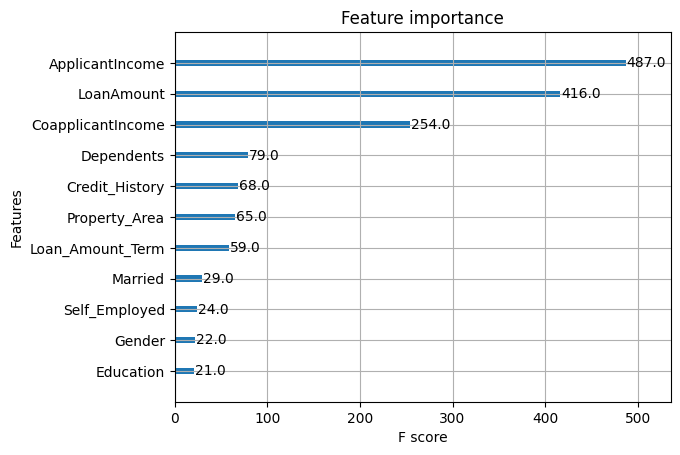

In [13]:
from xgboost import XGBClassifier
import xgboost

x = ds.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = ds['Loan_Status']

featureImportance = XGBClassifier()
featureImportance.fit(x, y)

xgboost.plot_importance(featureImportance, importance_type = 'weight')

In [24]:
# Select the best features 
selFeatures = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Credit_History', 'Property_Area', 'Loan_Status']
ds = ds[selFeatures]
ds.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Credit_History,Property_Area,Loan_Status
0,0.070489,0.198860,0.000000,0.0,1.0,2,1
1,0.054830,0.172214,0.036192,0.5,1.0,0,0
2,0.035250,0.082489,0.000000,0.0,1.0,2,1
3,0.030093,0.160637,0.056592,0.0,1.0,2,1
4,0.072356,0.191027,0.000000,0.0,1.0,2,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x = ds.drop(['Loan_Status'], axis = 1)
y = ds['Loan_Status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 32)

Testing for underfitting of the model
Accuracy Score is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       340

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



<Axes: >

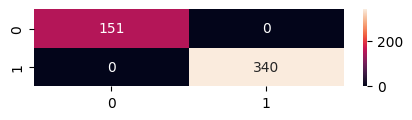

In [36]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

cv = model.predict(xtrain)
print(f'Testing for underfitting of the model')
print(f'Accuracy Score is: {accuracy_score(ytrain, cv)}')
print(classification_report(ytrain, cv))

plt.figure(figsize=(5,1))
sns.heatmap(confusion_matrix(ytrain, cv), annot = True, fmt='d')

Testing for overfitting of the model
Test accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.78      0.94      0.85        82

    accuracy                           0.78       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.78      0.76       123



<Axes: >

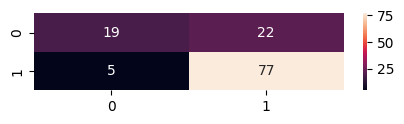

In [37]:
test_pred = model.predict(xtest)
print(f'Testing for overfitting of the model')
print("Test accuracy:", accuracy_score(ytest, np.round(test_pred)))
print(classification_report(ytest, np.round(test_pred)))

plt.figure(figsize=(5,1))
sns.heatmap(confusion_matrix(ytest, test_pred), annot = True, fmt='d')

In [38]:
joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']